In [1]:
# Installing packages used for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Reading the dataset
df = pd.read_csv("sample_interview_dataset.csv")
df

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp
0,M14860,x1,298.1,308.6,1551.0,42.8,0,0,No Failure,2001-12-01 00:00:00
1,L47181,x_1,298.2,308.7,1408.0,46.3,3,0,No Failure,2001-12-01 01:00:00
2,L47182,x_1,298.1,308.5,1498.0,49.4,5,0,No Failure,2001-12-01 02:00:00
3,L47183,x_1,298.2,308.6,1433.0,39.5,7,0,No Failure,2001-12-01 03:00:00
4,L47184,x_1,298.2,308.7,1408.0,40.0,9,0,No Failure,2001-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
9995,M24855,x1,298.8,308.4,1604.0,29.5,14,0,No Failure,2003-01-21 11:00:00
9996,H39410,X1,298.9,308.4,1632.0,31.8,17,0,No Failure,2003-01-21 12:00:00
9997,M24857,x1,299.0,308.6,1645.0,33.4,22,0,No Failure,2003-01-21 13:00:00
9998,H39412,X1,299.0,308.7,1408.0,48.5,25,0,No Failure,2003-01-21 14:00:00


### Exploratory Analysis of the Dataset

#### Understanding Our Dataset

In [5]:
df.head()

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp
0,M14860,x1,298.1,308.6,1551.0,42.8,0,0,No Failure,2001-12-01 00:00:00
1,L47181,x_1,298.2,308.7,1408.0,46.3,3,0,No Failure,2001-12-01 01:00:00
2,L47182,x_1,298.1,308.5,1498.0,49.4,5,0,No Failure,2001-12-01 02:00:00
3,L47183,x_1,298.2,308.6,1433.0,39.5,7,0,No Failure,2001-12-01 03:00:00
4,L47184,x_1,298.2,308.7,1408.0,40.0,9,0,No Failure,2001-12-01 04:00:00


In [6]:
df.info()

# Note we have 100 missing values from Rotation Speed (rpm) that will be addressed before analsis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UID                      10000 non-null  object 
 1   Machine Type             10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   9900 non-null   float64
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
 9   Timestamp                10000 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


In [7]:
df.describe

<bound method NDFrame.describe of          UID Machine Type  Air temperature [K]  Process temperature [K]  \
0     M14860           x1                298.1                    308.6   
1     L47181          x_1                298.2                    308.7   
2     L47182          x_1                298.1                    308.5   
3     L47183          x_1                298.2                    308.6   
4     L47184          x_1                298.2                    308.7   
...      ...          ...                  ...                      ...   
9995  M24855           x1                298.8                    308.4   
9996  H39410           X1                298.9                    308.4   
9997  M24857           x1                299.0                    308.6   
9998  H39412           X1                299.0                    308.7   
9999  M24859           x1                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Targe

In [8]:
# Understanding the dsitribution of datapoints in catogrical dataset

print(df['Target'].value_counts())
print(df['Machine Type'].value_counts())
print(df['Failure Type'].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64
Machine Type
x_1    5937
x1     2974
X1      989
X2      100
Name: count, dtype: int64
Failure Type
No Failure                  9553
Heat Dissipation Failure     112
Error                        100
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               17
Name: count, dtype: int64


**From the initial EDA we understand that our data has:**
* The data has loaded correctly

* 10,000 entries and 10 columns.

* Mixed datatypes: 4 categorical, 4 numerical (float/int), and 2 identifier/timestamp.

* One column (Rotational speed [rpm]) has missing values (100 missing).

* Target appears to be a binary indicator — possibly failure occurrence.

* We have some class imbalance issues that need to be addressed i.e Target varaible/Failure Type

#### Quality Control

**In this section we examine our data for:**

* Completeness (missing data)
* Duplication
* Anomalous Results

In [11]:
# Examining for missing values (Note: 100 NA values found)
df.isnull().sum()

UID                          0
Machine Type                 0
Air temperature [K]          0
Process temperature [K]      0
Rotational speed [rpm]     100
Torque [Nm]                  0
Tool wear [min]              0
Target                       0
Failure Type                 0
Timestamp                    0
dtype: int64

In [12]:
# We are inserting the median value into the 100 missing values of "rotational speed". Note: Mean is not used here as distibution is skewed to the right

df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].fillna(df['Rotational speed [rpm]'].median())

df.isnull().sum() # We have solved the missing values in the dataset

UID                        0
Machine Type               0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
Timestamp                  0
dtype: int64

In [13]:
# Examining for Duplicated Results
df.duplicated().sum()

0

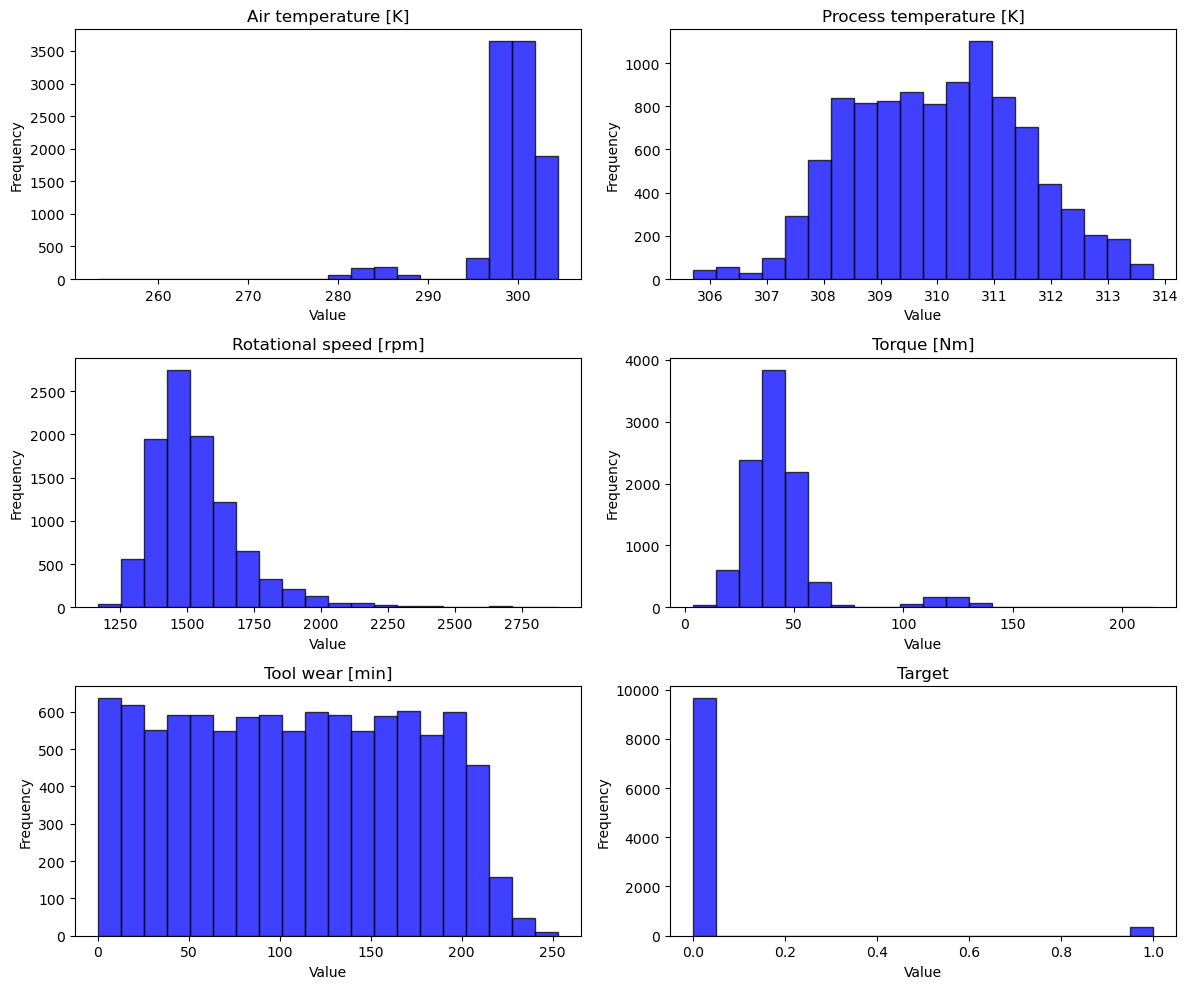

In [14]:
# Visualising the datapoint distributions in Numerical Data
def plot_num_hist(data):
    """
    Plots histograms for numerical features in the dataset.
    """
    # Only include numerical features
    features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
                'Torque [Nm]', 'Tool wear [min]', 'Target']
    
    plt.figure(figsize=(12, 10))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 2, i)  # 3 rows, 2 columns
        plt.hist(data[feature].dropna(), bins=20, edgecolor='black', alpha=0.75, color='blue')
        plt.title(feature, fontsize=12)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_num_hist(df)

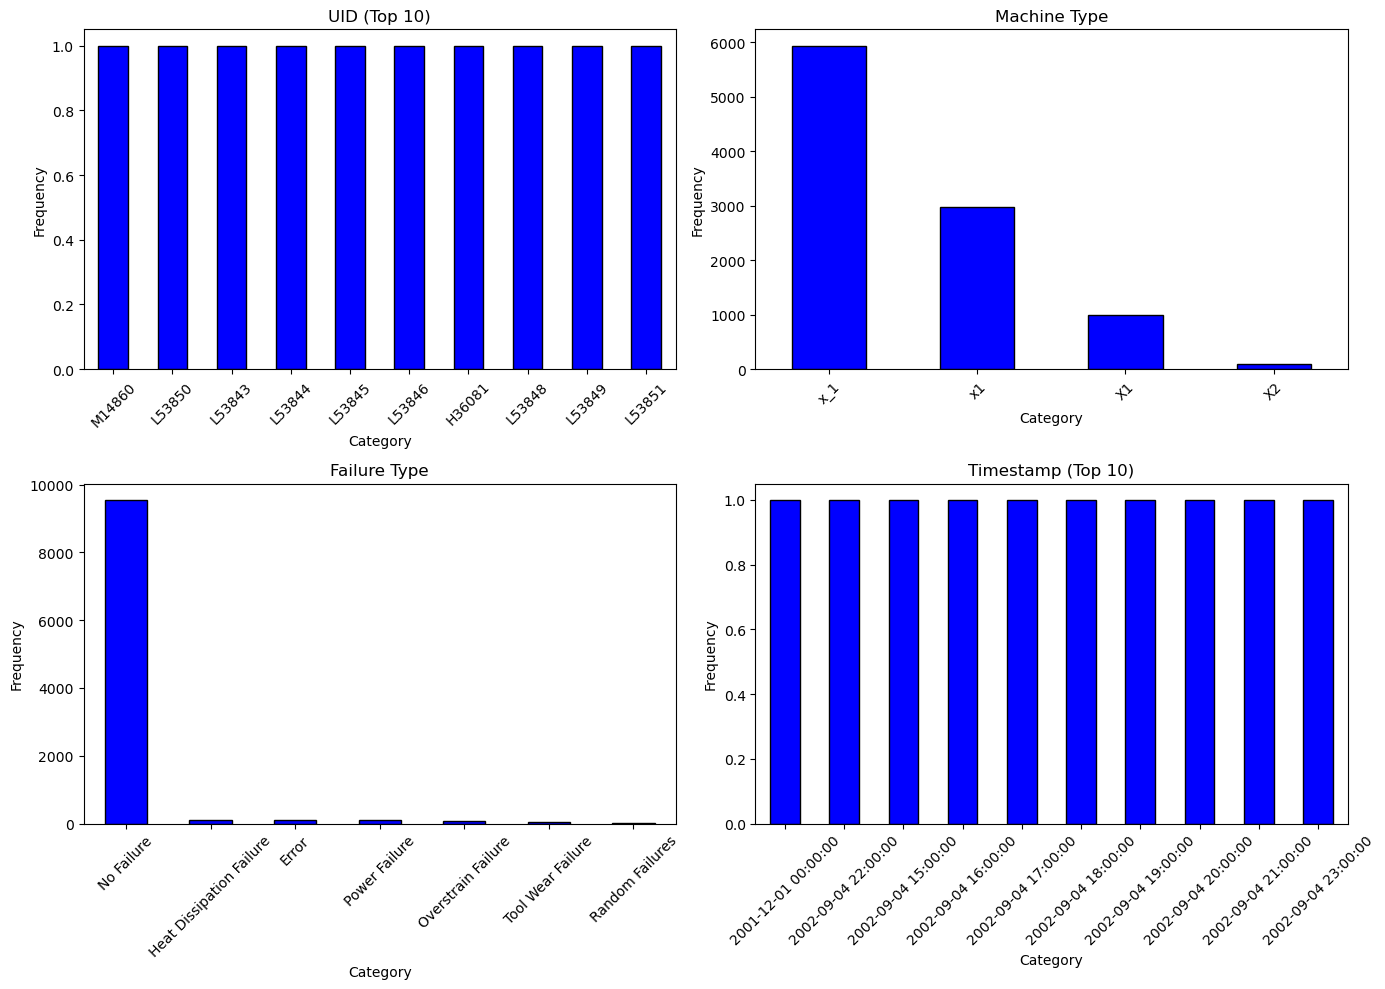

In [15]:
# Visualising the datapoint distributions in Categorical Data
def plot_cat(data):
    """
    Plots bar charts for categorical features in the dataset.
    """
    # Define categorical features
    features = ['UID', 'Machine Type', 'Failure Type', 'Timestamp']
    
    plt.figure(figsize=(14, 10))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        
        # Count unique values
        value_counts = data[feature].value_counts()
        
        # For high-cardinality features like UID or Timestamp, limit to top 10
        if value_counts.shape[0] > 10:
            value_counts = value_counts[:10]
            title = f"{feature} (Top 10)"
        else:
            title = feature

        value_counts.plot(kind='bar', color='blue', edgecolor='black')
        plt.title(title, fontsize=12)
        plt.xlabel('Category')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_cat(df)

#### Understanding the effects of performance over time

Here we are:

* Creating a cumulative counter to understand frequency of errors occuring over time
* Visualise this result for stakeholders


In [17]:
# Initialize the counter and list for Timed_Errors
timed_errors = []
counter = 0

# Loop through the 'Target' column
for value in df['Target']:
    if value == 1:
        counter = 0
    else:
        counter += 1
    timed_errors.append(counter)

# Add the new column to the DataFrame
df['Timed_Errors'] = timed_errors

In [95]:
#Quality Control for Sum of target == 1 is the same as Timed_Errors == 0

sum_errors = (df['Target'] == 1).sum()
print(sum_errors) # 339 

Timed_Errors = (df['Timed_Errors'] == 0).sum()
print(Timed_Errors)

337
337


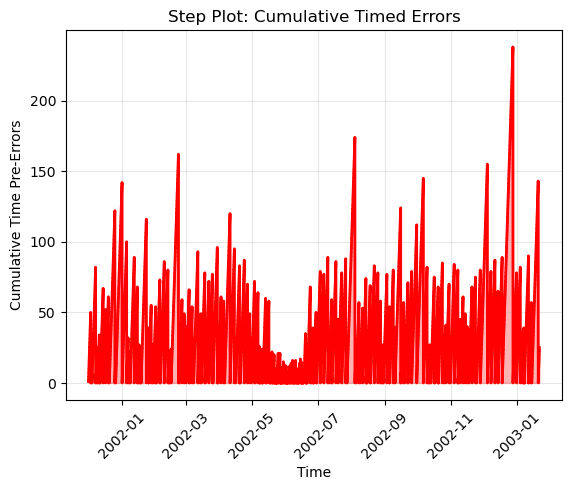

In [81]:
# Convert Timestamp to datetime and sort
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

plt.step(df['Timestamp'], df['Timed_Errors'], where='post', color='red', linewidth=2)
plt.fill_between(df['Timestamp'], df['Timed_Errors'], step='post', alpha=0.3, color='red')
plt.title('Step Plot: Cumulative Timed Errors')
plt.xlabel('Time')
plt.ylabel('Cumulative Time Pre-Errors')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [21]:
#Performance Prediction Questions:
1. Failure Prediction

Can we predict when a machine will fail based on operating conditions?
Which combination of parameters (temperature, speed, torque) best predicts failure?
How far in advance can we reliably predict failures?

2. Failure Type Classification

Can we predict the specific type of failure (heat dissipation, overstrain, tool wear, etc.)?
Which sensors/parameters are most indicative of each failure type?

Performance Optimization Questions:
3. Operating Condition Analysis

What are the optimal operating ranges for temperature, speed, and torque?
Which parameter combinations maximize uptime?
How do different machine types perform under similar conditions?

4. Maintenance Scheduling

Can we predict optimal maintenance intervals based on tool wear patterns?
How does performance degrade over time for each machine type?

Root Cause Analysis Questions:
5. Feature Importance

Which variables contribute most to machine failures?
Are there interaction effects between parameters (e.g., high temperature + high speed)?
How does tool wear correlate with other performance indicators?

6. Anomaly Detection

Can we identify unusual operating patterns that precede failures?
What constitutes "normal" vs "abnormal" machine behavior?

Recommended ML Approaches:

Classification: Random Forest, SVM, or Neural Networks for failure type prediction
Regression: For predicting continuous metrics like remaining useful life
Time Series Analysis: For trend analysis and temporal patterns
Clustering: To identify distinct operating regimes or machine states
Anomaly Detection: Isolation Forest or autoencoders for unusual patterns
